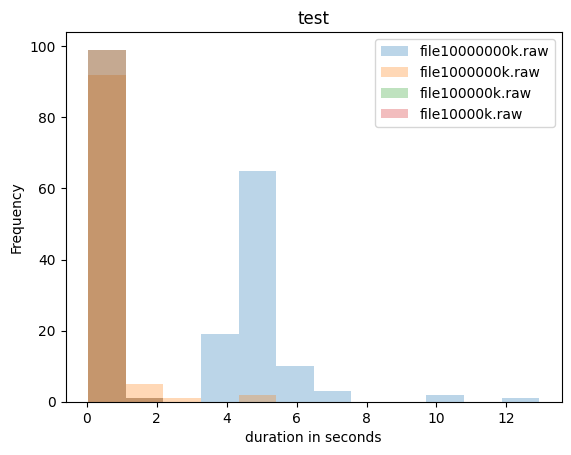

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"./1-Replication/testresults/delegated_upload_results.csv")
del df["Unnamed: 0"]
ax = df.plot.hist(bins=12,alpha=0.3)
ax.set_title("test")
ax.set_xlabel("duration in seconds")
plt.show()

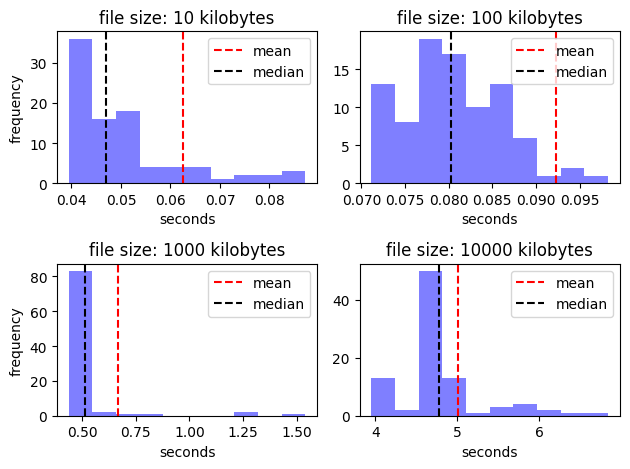

In [27]:
# Calculate the lower and upper bounds for each column
lower_bounds = {}
upper_bounds = {}
#reverse the order, smallest file size first.
columns  = df.columns[::-1] 
for column in columns:
    lower_bounds[column] = df[column].quantile(0.05)
    upper_bounds[column] = df[column].quantile(0.95)

# Plot the histograms in a single figure, specifying the range of values to include for each column
for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1)
    plt.hist(df[column], range=(lower_bounds[column], upper_bounds[column]), color="blue", alpha = 0.5)
    plt.title("file size: "+ column[4:-8] + " kilobytes")
    plt.xlabel("seconds")
    # only ylabel the figures on the left
    if not i%2: plt.ylabel("frequency")

    # Calculate the mean and median
    mean = df[column].mean()
    median = df[column].median()

    # Draw vertical lines at the positions of the mean and median
    plt.axvline(mean, color='r', linestyle='--', label='mean')
    plt.axvline(median, color="black", linestyle='--', label='median')

    # Add a legend
    plt.legend()

plt.tight_layout()
plt.show()


In [79]:
def makeplot(filepath: str, color: str):
    df = pd.read_csv(filepath)
    del df["Unnamed: 0"]

    # Calculate the lower and upper bounds for each column
    lower_bounds = {}
    upper_bounds = {}
    # reverse the order, smallest file size first.
    columns = df.columns[::-1]
    for column in columns:
        lower_bounds[column] = df[column].quantile(0.05)
        upper_bounds[column] = df[column].quantile(0.95)

    # Plot the histograms in a single figure, specifying the range of values to include for each column
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i+1)
        plt.hist(df[column], range=(lower_bounds[column],
                                    upper_bounds[column]), color=color, alpha=0.6)
        plt.title("file size: " + column[4:-8] + " kilobytes")
        plt.xlabel("seconds")
        # only ylabel the figures on the left
        if not i % 2:
            plt.ylabel("frequency")

        # Calculate the mean and median
        mean = df[column].mean()
        median = df[column].median()

        # Draw vertical lines at the positions of the mean and median
        plt.axvline(mean, color='r', linestyle='--', label='mean')
        plt.axvline(median, color="black", linestyle='--', label='median')

        # Add a legend
        plt.legend()

    plt.tight_layout()
    # plt.title(filepath) #add titles in latex
    plt.show()


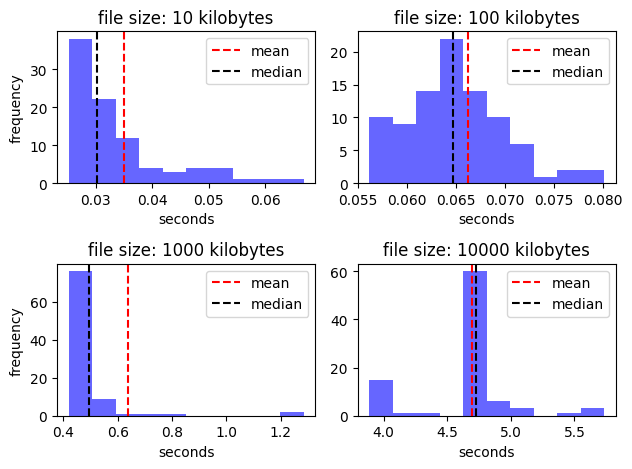

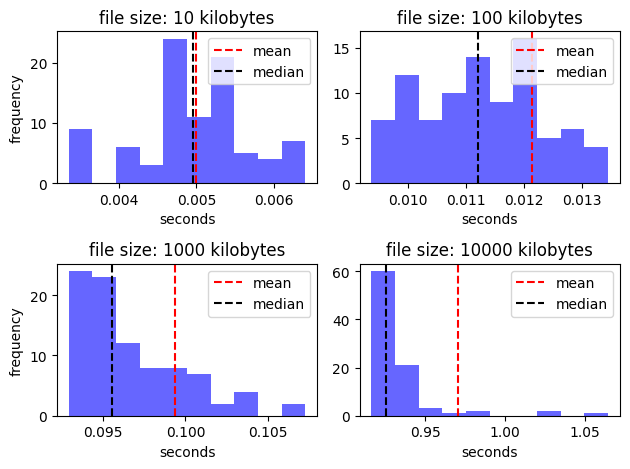

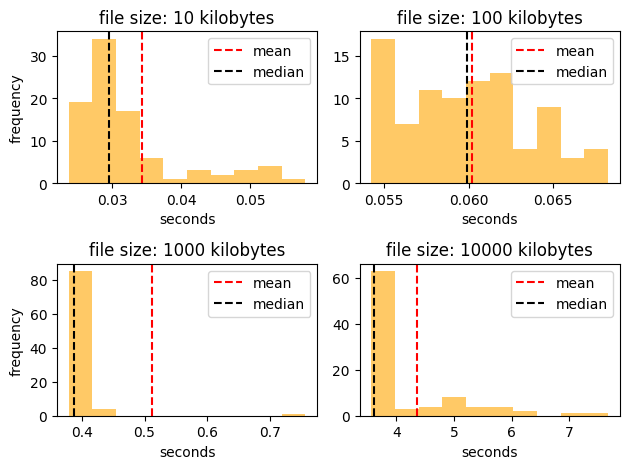

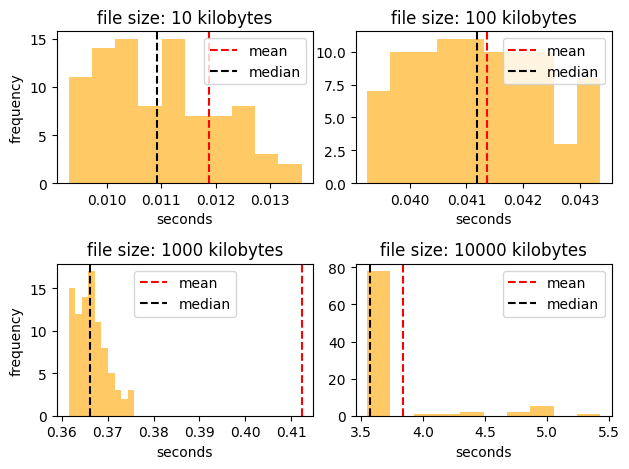

In [80]:

# k is alwasy 4 in the histograms
makeplot(r"./1-Replication/testresults/delegated_last_results.csv", "blue")
makeplot(r"./1-Replication/testresults/delegated_lead_results.csv", "blue")
makeplot(r"./1-Replication/testresults/normal_last_results.csv", "orange")
makeplot(r"./1-Replication/testresults/normal_lead_results.csv", "orange")

Medians to make tables for different node amounts (k)

In [43]:
df = pd.read_csv(r"./1-Replication/testresults/delegated_last_results.csv")
del df["Unnamed: 0"]
print(df.median())

df = pd.read_csv(r"./1-Replication/testresults/delegated_last_results_k3.csv")
del df["Unnamed: 0"]
print(df.median())

df = pd.read_csv(r"./1-Replication/testresults/delegated_last_results_k2.csv")
del df["Unnamed: 0"]
print(df.median())


file10000000k.raw    4.722789
file1000000k.raw     0.494100
file100000k.raw      0.064662
file10000k.raw       0.030114
dtype: float64
file10000000k.raw    3.753094
file1000000k.raw     0.390036
file100000k.raw      0.052623
file10000k.raw       0.027736
dtype: float64
file10000000k.raw    2.796528
file1000000k.raw     0.290595
file100000k.raw      0.038425
file10000k.raw       0.026960
dtype: float64


In [48]:
df = pd.read_csv(r"./1-Replication/testresults/normal_upload_results.csv")
del df["Unnamed: 0"]
print(df.median())

df = pd.read_csv(r"./1-Replication/testresults/normal_upload_results_k3.csv")
del df["Unnamed: 0"]
print(df.median())

df = pd.read_csv(r"./1-Replication/testresults/normal_upload_results_k2.csv")
del df["Unnamed: 0"]
print(df.median())

file10000000k.raw    3.653739
file1000000k.raw     0.404372
file100000k.raw      0.073695
file10000k.raw       0.045211
dtype: float64
file10000000k.raw    2.851560
file1000000k.raw     0.328481
file100000k.raw      0.072128
file10000k.raw       0.043110
dtype: float64
file10000000k.raw    2.752528
file1000000k.raw     0.306649
file100000k.raw      0.061744
file10000k.raw       0.043144
dtype: float64


In [75]:
# import numpy as np
# df = pd.read_csv(r"./1-Replication/testresults/get_results.csv")
# del df["Unnamed: 0"]
# data = df.median().to_numpy()
# plt.plot([10,100,1000,10000], data[::-1],"r--")
# plt.xlabel("filesize in bytes")
# plt.ylabel("download time in seconds")
# plt.title("Median time to download")
# plt.show()

We compare no different node amounts nor replications schemes for "GET" as we know from our architecture that it does not make a difference

In [76]:

df = pd.read_csv(r"./1-Replication/testresults/get_results.csv")
del df["Unnamed: 0"]
df.median()

330    1.837337
230    0.197066
130    0.034503
30     0.017570
dtype: float64